## LIMPIEZA

In [27]:
import pandas as pd
import numpy as np
df2 = pd.read_csv("features3.csv", quotechar='"',
               usecols=['class','post_comment_count',
                'post_favorite_count','post_score',
                'post_view_count','users_reputation','users_up_votes',
                'users_down_votes','score_prev_acceptans',
                'score_prev_ans','score_prev_comment',
                'score_prev_question','score_prev_favquestion',
                'age_user','title_length','num_block_code','num_i_sentences',
                'num_wh_words','num_y_sentences','tags_popularity','num_tags','num_words','code_length', 'num_url','user_numpost','user_numpost_answered','post_error']
                   )
df2.head()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,...,num_block_code,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,num_url,post_error,code_length
0,0,2,0,3,1279,1377,106,2,0,4,...,1,0,0,0,2,4,13.0,1.0,0.0,473.0
1,0,2,0,1,334,64,14,0,0,0,...,1,9,2,0,1,4,84.0,1.0,0.0,1192.0
2,0,2,0,0,118,1,0,0,0,0,...,0,5,1,0,1,2,41.0,0.0,0.0,0.0
3,0,3,0,0,71,354,35,1,4,7,...,0,4,0,0,2,5,50.0,1.0,0.0,0.0
4,0,2,0,0,155,1,0,0,0,0,...,7,7,2,0,1,2,55.0,0.0,0.0,1252.0


Se obtienen estadísticas del dataset para detectar outliers. 

In [28]:
num_features = ['post_comment_count',
                'post_favorite_count','post_score',
                'post_view_count','users_reputation','users_up_votes',
                'users_down_votes','score_prev_acceptans',
                'score_prev_ans','score_prev_comment',
                'score_prev_question','score_prev_favquestion',
                'age_user','title_length','num_block_code','num_i_sentences',
                'num_wh_words','num_y_sentences','tags_popularity','num_tags','num_words','code_length', 'num_url','user_numpost','user_numpost_answered']

In [29]:
df_statistics=pd.DataFrame(index=num_features)
for index, row in df_statistics.iterrows():
    df_statistics.loc[index,"min"]=df2[index].min()
    df_statistics.loc[index,"max"] = df2[index].max()
    df_statistics.loc[index,"mean"] = df2[index].mean()
    df_statistics.loc[index,"std"] = df2[index].std()
    df_statistics.loc[index,"var"] = df2[index].var()
df_statistics

,min,max,mean,std,var
post_comment_count,0.0,38.0,2.83385,3.012457,9.074898e+00
post_favorite_count,0.0,204.0,0.20250,1.706382,2.911739e+00
post_score,-11.0,284.0,0.89285,3.874793,1.501402e+01
post_view_count,5.0,227453.0,399.96845,2540.775961,6.455542e+06
users_reputation,1.0,666690.0,1171.29105,8417.321886,7.085131e+07
users_up_votes,0.0,29496.0,170.90780,698.433331,4.878091e+05
users_down_votes,0.0,11788.0,16.17880,179.069700,3.206596e+04
score_prev_acceptans,-14.0,58871.0,35.56555,554.644810,3.076309e+05
score_prev_ans,-17.0,74441.0,63.00365,780.528884,6.092253e+05
score_prev_comment,0.0,19977.0,25.24695,227.321026,5.167485e+04


Todos los atributos tienen una varianza significativa para considerarlos en el análisis. El atributo age_user tiene un valor negativo, que se elimina del dataset este registro y se analiza las características que tienen valores maximos demasiado elevados. 
El atributo num_words tiene 0 como valor mínimo, esto puede deberse a que la pregunta posee solamente código o texto en tags diferentes a listas y párrafos. Por el momento eliminaremos estos registros y dependiendo de la cantidad que se eliminen, se analizará con mayor de talle el texto de estos registros.

In [30]:
df2= df2.loc[df2['num_words'] >0,:]
df2= df2.loc[df2['age_user'] >=0, :]
df2.describe()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,...,num_block_code,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,num_url,post_error,code_length
count,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,...,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000
mean,0.499975,2.834159,0.202561,0.893491,400.137276,1171.931462,171.001551,16.187703,35.585122,63.038321,...,1.486918,3.677673,1.119566,0.013257,1.449697,3.058482,49.361149,0.412027,0.244885,1008.508230
std,0.500013,3.012957,1.706836,3.875619,2541.463799,8419.593434,698.614051,179.118565,554.796780,780.742229,...,1.419648,3.073334,1.346514,0.126823,0.981637,1.207189,40.341726,0.901729,0.430030,2024.939943
min,0.000000,0.000000,0.000000,-11.000000,5.000000,1.000000,0.000000,0.000000,-14.000000,-17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,50.000000,18.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,25.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,103.000000,93.000000,13.000000,0.000000,0.000000,1.000000,...,1.000000,3.000000,1.000000,0.000000,1.000000,3.000000,40.000000,0.000000,0.000000,367.000000
75%,1.000000,4.000000,0.000000,1.000000,267.000000,560.000000,86.000000,2.000000,4.000000,11.000000,...,2.000000,5.000000,2.000000,0.000000,2.000000,4.000000,62.000000,1.000000,0.000000,1091.000000
max,1.000000,38.000000,204.000000,284.000000,227453.000000,666690.000000,29496.000000,11788.000000,58871.000000,74441.000000,...,19.000000,44.000000,14.000000,5.000000,5.000000,5.000000,1521.000000,36.000000,1.000000,28847.000000


Se eliminaron solamente 6 registros. A continuación se analizará los atributos con valores demasiado altos.

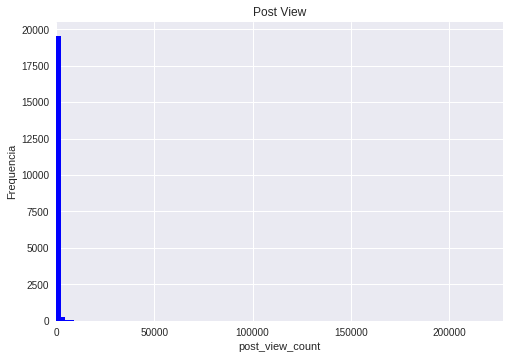

In [31]:
import matplotlib.pyplot as plt
plt.hist(df2['post_view_count'], bins=100, color="blue")
plt.xlim(xmin=0, xmax=df2['post_view_count'].max())
plt.title("Post View")
plt.ylabel("Frequencia")
plt.xlabel("post_view_count")
plt.show()

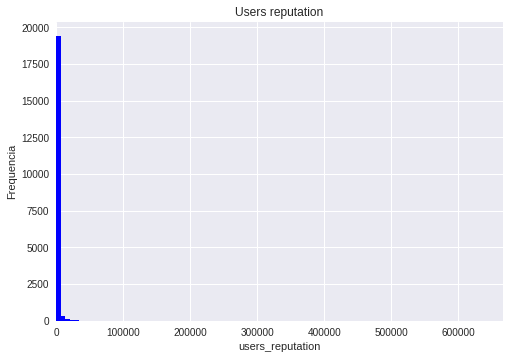

In [32]:
plt.hist(df2['users_reputation'], bins=100, color="blue")
plt.xlim(xmin=0, xmax=df2['users_reputation'].max())
plt.title("Users reputation")
plt.ylabel("Frequencia")
plt.xlabel("users_reputation")
plt.show()

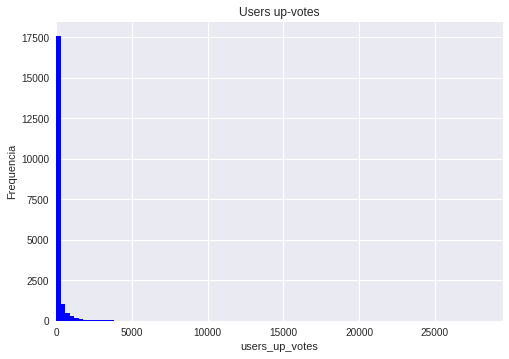

In [33]:
plt.hist(df2['users_up_votes'], bins=100, color="blue")
plt.xlim(xmin=0, xmax=df2['users_up_votes'].max())
plt.title("Users up-votes")
plt.ylabel("Frequencia")
plt.xlabel("users_up_votes")
plt.show()

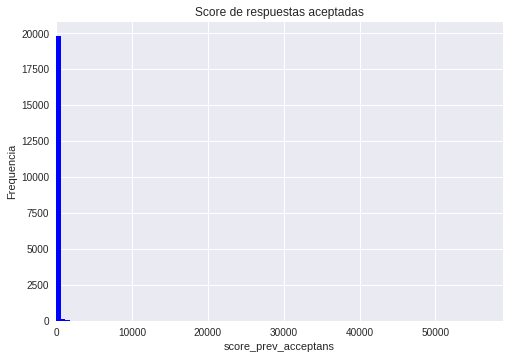

In [34]:
plt.hist(df2['score_prev_acceptans'], bins=100, color="blue")
plt.xlim(xmin=0, xmax=df2['score_prev_acceptans'].max())
plt.title("Score de respuestas aceptadas")
plt.ylabel("Frequencia")
plt.xlabel("score_prev_acceptans")
plt.show()

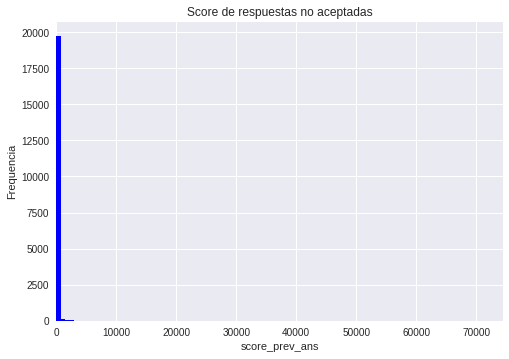

In [35]:
plt.hist(df2['score_prev_ans'], bins=100, color="blue")
plt.xlim(xmin=0, xmax=df2['score_prev_ans'].max())
plt.title("Score de respuestas no aceptadas")
plt.ylabel("Frequencia")
plt.xlabel("score_prev_ans")
plt.show()

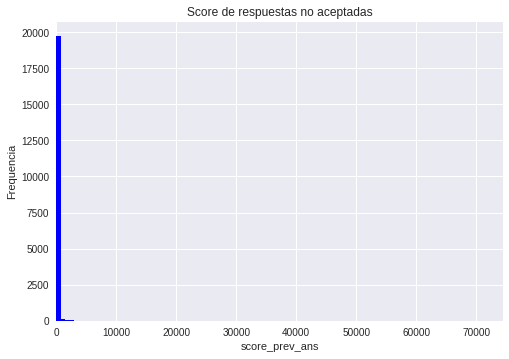

In [36]:
plt.hist(df2['score_prev_ans'], bins=100, color="blue")
plt.xlim(xmin=0, xmax=df2['score_prev_ans'].max())
plt.title("Score de respuestas no aceptadas")
plt.ylabel("Frequencia")
plt.xlabel("score_prev_ans")
plt.show()

Los valores altos de las características analizadas son de un valor reducido de datos. Creamos una matriz de correlación para identificar atributos que se puedan eliminar por que tienen una alta correlación.

In [37]:
import seaborn as sns
df_rel=pd.DataFrame(data=df2, columns=['users_reputation', 'users_up_votes',
                'users_down_votes', 'score_prev_acceptans',
                'score_prev_ans', 'score_prev_comment',
                'score_prev_question', 'score_prev_favquestion',
                'age_user','user_numpost','user_numpost_answered'], index=df2.index)

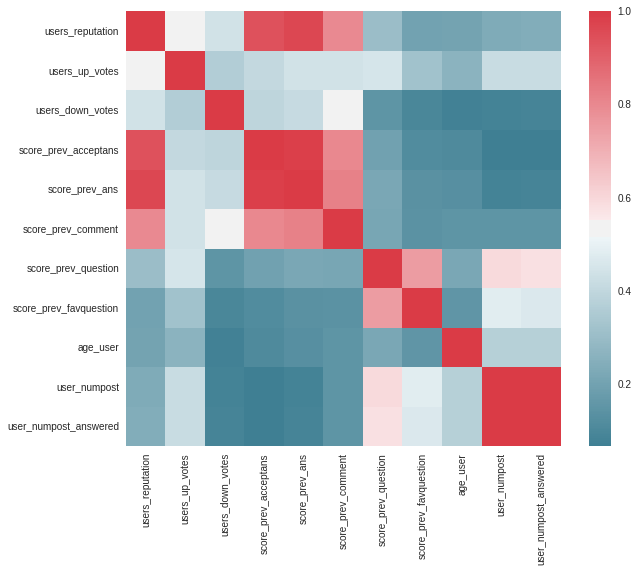

In [38]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_rel.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

Se puede ver que las características que corresponden al score de las respuestas dadas por el usuarios (score_prev_acceptans, score_prev_ans) tienen alta correlación con su reputación; sin embargo creemos por el momento considerar estos atributos y posteriormente analizar grupos que tengan valores similares en estas características.
Filtramos los datos para eliminar los registros que tengan el atibuto users_reputation demasiado alto.

In [39]:
df2= df2.loc[df2['users_reputation'] <10000, :]

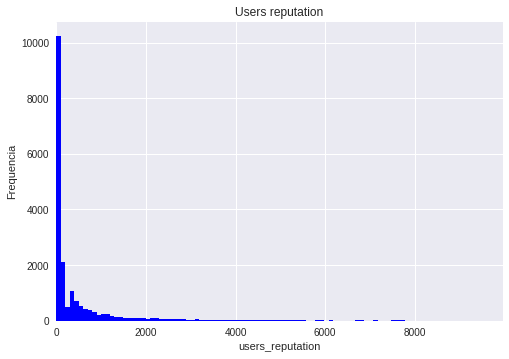

In [40]:
plt.hist(df2['users_reputation'], bins=100, color="blue")
plt.xlim(xmin=0, xmax=df2['users_reputation'].max())
plt.title("Users reputation")
plt.ylabel("Frequencia")
plt.xlabel("users_reputation")
plt.show()

In [41]:
df2.describe()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,...,num_block_code,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,num_url,post_error,code_length
count,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,...,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000
mean,0.498062,2.832143,0.193665,0.838876,391.875905,579.809242,124.229573,8.826533,10.481077,22.075946,...,1.485515,3.682342,1.120422,0.013006,1.451953,3.058911,49.334795,0.404060,0.245690,1015.742069
std,0.500009,3.007807,1.692380,3.482459,2495.739309,1249.651617,393.011273,83.587698,37.976133,69.494568,...,1.416221,3.077554,1.347212,0.124459,0.982537,1.206481,40.267808,0.884421,0.430507,2036.064867
min,0.000000,0.000000,0.000000,-11.000000,5.000000,1.000000,0.000000,0.000000,-14.000000,-17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,50.000000,16.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,25.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,103.000000,88.000000,12.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,1.000000,0.000000,1.000000,3.000000,40.000000,0.000000,0.000000,371.000000
75%,1.000000,4.000000,0.000000,1.000000,266.000000,514.000000,77.000000,2.000000,3.000000,10.000000,...,2.000000,5.000000,2.000000,0.000000,2.000000,4.000000,62.000000,1.000000,0.000000,1100.000000
max,1.000000,38.000000,204.000000,284.000000,227453.000000,9961.000000,9593.000000,5804.000000,866.000000,1208.000000,...,19.000000,44.000000,14.000000,5.000000,5.000000,5.000000,1521.000000,36.000000,1.000000,28847.000000


Con el filtro aplicado se tiene 4912 registros, es decir menos del 5% tenían valores altos en el atributo users_reputation y en los atributos de score relacionados.

Se eliminan las características que tienen alta correlación del conjunto de características:

In [42]:
df3 = pd.DataFrame(data=df2, index=df2.index, columns=['class','post_comment_count',
                'post_favorite_count','post_score',
                'post_view_count','users_reputation','users_up_votes',
                'users_down_votes','score_prev_question','score_prev_favquestion',
                'age_user','title_length','num_block_code','num_i_sentences',
                'num_wh_words','num_y_sentences','tags_popularity','num_tags',
                'num_words','code_length', 'num_url','user_numpost','user_numpost_answered'])
df3.head()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_question,score_prev_favquestion,...,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,code_length,num_url,user_numpost,user_numpost_answered
0,0,2,0,3,1279,1377,106,2,22,2,...,0,0,0,2,4,13.0,473.0,1.0,167,158
1,0,2,0,1,334,64,14,0,3,4,...,9,2,0,1,4,84.0,1192.0,1.0,14,11
2,0,2,0,0,118,1,0,0,0,0,...,5,1,0,1,2,41.0,0.0,0.0,1,0
3,0,3,0,0,71,354,35,1,0,0,...,4,0,0,2,5,50.0,0.0,1.0,31,24
4,0,2,0,0,155,1,0,0,0,0,...,7,2,0,1,2,55.0,1252.0,0.0,4,3


## ANÁLISIS PREGUNTA 1: ¿A qué se debe que algunas de las preguntas en StackOverflow no tengan una respuesta?

Debido a la heterogeneidad del dataset es necesario normalizar los datos, para ello usamos la función z-score que sirve para normalizar los datos cuando la diferencia entre el valor mínimo y máximo es demasiado grande.

In [43]:
num_features=['post_comment_count', 'post_favorite_count','post_score',
                'post_view_count','users_reputation','users_up_votes',
                'users_down_votes','score_prev_question','score_prev_favquestion',
                'age_user','title_length','num_block_code','num_i_sentences',
                'num_wh_words','num_y_sentences','tags_popularity','num_tags',
                'num_words','code_length', 'num_url','user_numpost','user_numpost_answered']

In [44]:
for each in num_features:
    mean, std = df3[each].mean(), df3[each].std()
    df3.loc[:, each] = (df3[each] - mean)/std
df3.describe()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_question,score_prev_favquestion,...,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,code_length,num_url,user_numpost,user_numpost_answered
count,19606.000000,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,...,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04
mean,0.498062,-1.696133e-14,2.538554e-15,5.873820e-15,4.989300e-16,-7.305693e-17,-1.537688e-15,1.922725e-15,3.242793e-15,3.136638e-15,...,-1.776847e-15,-1.424813e-15,9.439656e-16,-1.626092e-15,9.805479e-17,-2.715816e-17,-9.891948e-16,-9.901178e-16,-1.095511e-15,-6.770061e-16
std,0.500009,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-9.415973e-01,-1.144336e-01,-3.399574e+00,-1.550145e-01,-4.631765e-01,-3.160967e-01,-1.055961e-01,-9.563992e-01,-2.896552e-01,...,-1.196516e+00,-8.316600e-01,-1.045019e-01,-1.477760e+00,-1.706542e+00,-1.200333e+00,-4.988751e-01,-4.568639e-01,-4.408313e-01,-4.354539e-01
25%,0.000000,-9.415973e-01,-1.144336e-01,-2.408861e-01,-1.369838e-01,-4.511731e-01,-3.160967e-01,-1.055961e-01,-3.772032e-01,-2.896552e-01,...,-5.466491e-01,-8.316600e-01,-1.045019e-01,-4.599864e-01,-8.776854e-01,-6.043238e-01,-4.988751e-01,-4.568639e-01,-4.074551e-01,-3.979387e-01
50%,0.000000,-2.766611e-01,-1.144336e-01,-2.408861e-01,-1.157476e-01,-3.935571e-01,-2.855632e-01,-1.055961e-01,-3.090625e-01,-2.896552e-01,...,-2.217157e-01,-8.938632e-02,-1.045019e-01,-4.599864e-01,-4.882841e-02,-2.318178e-01,-3.166609e-01,-4.568639e-01,-3.295771e-01,-3.229083e-01
75%,1.000000,3.882751e-01,-1.144336e-01,4.626735e-02,-5.043632e-02,-5.266207e-02,-1.201736e-01,-8.166911e-02,-7.057008e-02,-6.354966e-02,...,4.281510e-01,6.528874e-01,-1.045019e-01,5.577874e-01,7.800285e-01,3.145243e-01,4.138273e-02,6.738195e-01,-5.144159e-02,-6.030190e-02
max,1.000000,1.169219e+01,1.204259e+02,8.131069e+01,9.097950e+01,7.507045e+00,2.409287e+01,6.933046e+01,1.771415e+01,2.605164e+01,...,1.310055e+01,9.560172e+00,4.006930e+01,3.611109e+00,1.608885e+00,3.654694e+01,1.366914e+01,4.024774e+01,2.498076e+01,2.534999e+01


Se usa el clasificador Super Vector Machine lineal, considerando que existen dos clases, además se realiza la clasificación con grupos de entrenamiento para finalmente realizar la predicción. Debido a que el dataset contiene el 22% de la clase 0, esperamos que el valor Recall sea alto.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

X = df3.iloc[:,1:]
y = df3.iloc[:,0]

clf=svm.SVC(kernel="linear",random_state=10)

In [46]:
print("Clasificador SVM")
print()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3000,random_state=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Clasificador SVM

             precision    recall  f1-score   support

          0       0.70      0.72      0.71      1463
          1       0.73      0.71      0.72      1537

avg / total       0.72      0.71      0.72      3000



Para evaluar el clasificador usamos DummyClassifier además de otros clasificadores como Decision Tree, Naive Bayes y KNeighbors, para comparar los resultados.

Para el DummyClassifier se aplica la estrategia "stratify", para que la muestra sea equitativa para las 2 clases.

In [47]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

c1 = ("Decision Tree", DecisionTreeClassifier())
c2 = ("Gaussian NB", GaussianNB())
# Para definir el numero de vecinos para KNN se aplica la raiz cuadrada de n 
c3 = ("KNeighbors", KNeighborsClassifier(n_neighbors=100))
c4 =  ("SVC",svm.SVC(kernel="linear",random_state=10))
c5 = ("Dummy: stratified", DummyClassifier(strategy="stratified", random_state=10))

clasificadores=[c1, c2, c3, c4, c5]

summary=pd.DataFrame(index=['precision','recall', 'f1', 'accuracy'], columns=['Decision Tree','Gaussian NB','KNeighbors','SVC',
                                                                              'Dummy: stratified'])

In [48]:
for name, clf in clasificadores:
    print(name)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000,random_state=10)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    summary.loc['precision',name]=np.mean(metrics.precision_score(y_test, y_pred,average='weighted', labels=[0,1]))
    summary.loc['recall', name] = np.mean(metrics.recall_score(y_test, y_pred,average='weighted', labels=[0,1]))
    summary.loc['f1', name] = np.mean(metrics.f1_score(y_test, y_pred,average='weighted', labels=[0,1]))
    summary.loc['accuracy', name]=np.mean(metrics.accuracy_score(y_test, y_pred))

summary

Decision Tree
             precision    recall  f1-score   support

          0       0.77      0.75      0.76      2476
          1       0.76      0.78      0.77      2524

avg / total       0.76      0.76      0.76      5000

Gaussian NB
             precision    recall  f1-score   support

          0       0.52      0.93      0.67      2476
          1       0.71      0.17      0.28      2524

avg / total       0.62      0.55      0.47      5000

KNeighbors
             precision    recall  f1-score   support

          0       0.63      0.78      0.70      2476
          1       0.72      0.55      0.62      2524

avg / total       0.67      0.66      0.66      5000

SVC
             precision    recall  f1-score   support

          0       0.70      0.74      0.72      2476
          1       0.73      0.69      0.71      2524

avg / total       0.72      0.71      0.71      5000

Dummy: stratified
             precision    recall  f1-score   support

          0       0.51     

,Decision Tree,Gaussian NB,KNeighbors,SVC,Dummy: stratified
precision,0.762318,0.61787,0.67348,0.715236,0.514195
recall,0.7622,0.547,0.6638,0.7146,0.514
f1,0.76213,0.472458,0.65977,0.714499,0.513916
accuracy,0.7622,0.547,0.6638,0.7146,0.514


De los resultados obtenidos se puede observar que Decision Tree aporta el valor más alto de accuracy y comparado con el clasificador Dummy se obtiene un valor superior. A continuación se obtiene la matriz de confusión para ver el total de elementos clasificados correctamente.

In [49]:
clf=DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000,random_state=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Confusion matrix, without normalization
[[1840  636]
 [ 564 1960]]
DecisionTreeClassifier


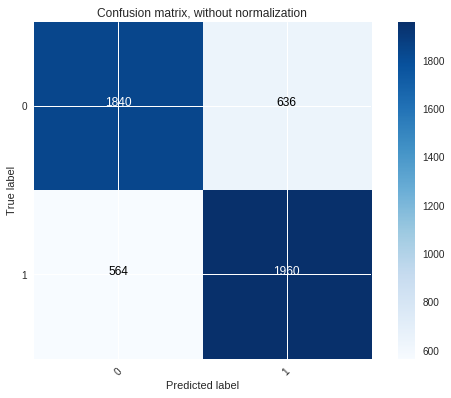

In [50]:
import itertools

from sklearn.metrics import confusion_matrix

class_names=[0,1]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
print("DecisionTreeClassifier")
plt.show()

Efectivamente el clasificador ha clasificado el 75% de los elementos de cada clase por lo que consideramos Decision Tree como el mejor clasificador para nuestros datos. Para observar cuáles fueron las características que aportaron mayormente en la predicción usamos un algoritmo RandomForest: ExtraTreeClasifier.

In [51]:
from sklearn.ensemble import ExtraTreesClassifier

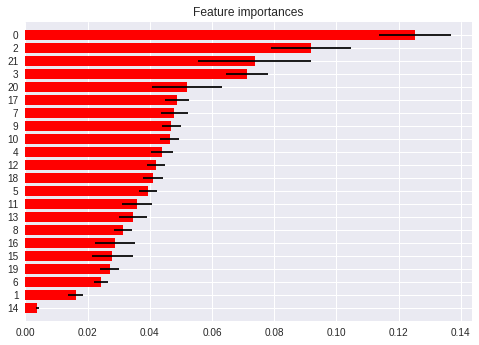

In [52]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")

plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()

In [53]:
list(df3)

['class',
 'post_comment_count',
 'post_favorite_count',
 'post_score',
 'post_view_count',
 'users_reputation',
 'users_up_votes',
 'users_down_votes',
 'score_prev_question',
 'score_prev_favquestion',
 'age_user',
 'title_length',
 'num_block_code',
 'num_i_sentences',
 'num_wh_words',
 'num_y_sentences',
 'tags_popularity',
 'num_tags',
 'num_words',
 'code_length',
 'num_url',
 'user_numpost',
 'user_numpost_answered']

Si se relaciona el orden de las features en el gráfico se puede observar que las características que denotan el historial del usuario como número de post realizados, número de post respondidos se sitúan entre los mejores predictores, sin embargo el score del post es el mejor de todos. 

Decidimos usar el clasificador eliminando los atributos como score del post y número de vistas para observar la participación del resto de atributos.

In [56]:
df_wpost=pd.DataFrame(data=df3, columns=['class','title_length',
 'num_block_code',
 'num_i_sentences',
 'num_wh_words',
 'num_tags',
 'code_length','users_reputation',
 'users_up_votes',
 'age_user'], index=df2.index)

X = df_wpost.iloc[:,1:]
y = df_wpost.iloc[:,0]
clf=DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000,random_state=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.52      0.52      0.52      2476
          1       0.53      0.53      0.53      2524

avg / total       0.52      0.52      0.52      5000



Con estas características se obtiene 0.52 de promedio en las medidas de precision, recall y f1. Esto quiere decir que son características importantes que también aportan en el clasificador. A continuación observamos algunas de estas características para las dos clases.

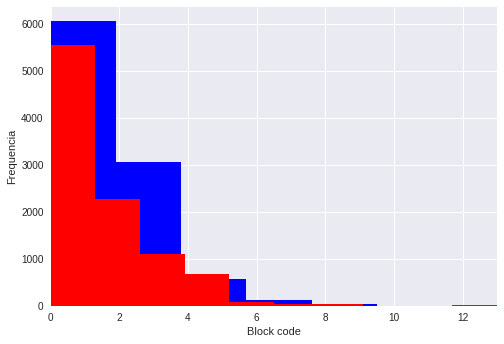

In [61]:
df0= df2.loc[df3['class'] ==0, :]
df0.describe()
plt.hist(df0['num_block_code'], bins=10, color="blue")
plt.xlim(xmin=0, xmax=df0['num_block_code'].max())
plt.ylabel("Frequencia")
plt.xlabel("Block code")


df1= df2.loc[df3['class'] ==1, :]
plt.hist(df1['num_block_code'], bins=10, color="red")
plt.xlim(xmin=0, xmax=df1['num_block_code'].max())
plt.ylabel("Frequencia")
plt.xlabel("Block code")
plt.show()

Se puede observar que para la clase de post sin respuesta, tienen más bloques de código. Se concluye que algunos post replican muchas pequeñas partes de código para plantear la pregunta, lo que dificulta que los posibles usuarios que respondan no puedan comprender la pregunta o tengan dificultad con replicar el problema para plantear una solución. 

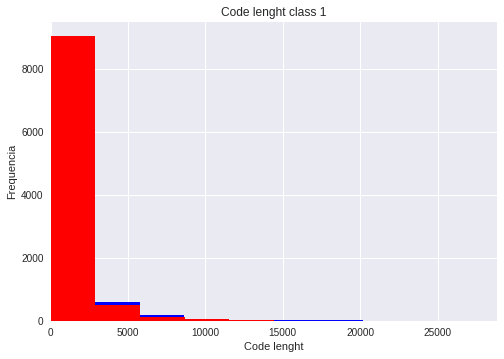

In [62]:
df0= df2.loc[df3['class'] ==0, :]
df0.describe()
plt.hist(df0['code_length'], bins=10, color="blue")
plt.xlim(xmin=0, xmax=df0['code_length'].max())
plt.title("Code lenght class 0")
plt.ylabel("Frequencia")
plt.xlabel("Code lenght")


df1= df2.loc[df3['class'] ==1, :]
plt.hist(df1['code_length'], bins=10, color="red")
plt.xlim(xmin=0, xmax=df1['code_length'].max())
plt.title("Code lenght class 1")
plt.ylabel("Frequencia")
plt.xlabel("Code lenght")
plt.show()

Por otro lado si se observa la cantidad de código en caracteres no tiene mucha diferencia, esto puede deberse a que existen post que tienen errores de código, como un StackTrace y esto ocupa demasiadas líneas siendo un solo bloque de código, pero de esta forma el posible respondedor podrá ver de forma clar el error y proponer una respuesta. 

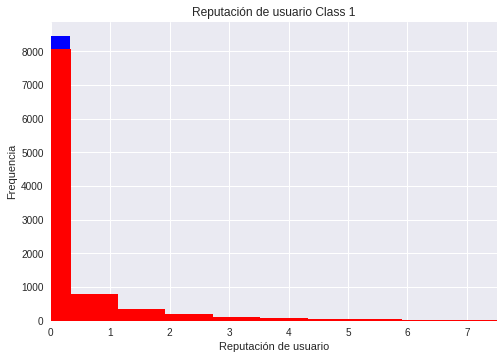

In [64]:
df0= df3.loc[df3['class'] ==0, :]
df0.describe()
plt.hist(df0['users_reputation'], bins=10, color="blue")
plt.xlim(xmin=0, xmax=df0['users_reputation'].max())
plt.title("Reputación de usuario Class 0")
plt.ylabel("Frequencia")
plt.xlabel("Reputación de usuario")


df1= df3.loc[df3['class'] ==1, :]
plt.hist(df1['users_reputation'], bins=10, color="red")
plt.xlim(xmin=0, xmax=df1['users_reputation'].max())
plt.title("Reputación de usuario Class 1")
plt.ylabel("Frequencia")
plt.xlabel("Reputación de usuario")
plt.show()

Si se analiza la reputación del usuario no existe mucha diferencia entre las preguntas que tienen y las que no tienen respuesta, por lo que se concluye que un usuario experimentado puede plantear preguntas demasiado complejas para ser respondidas y otras muy claras que si pueden obtener una respuesta. Sin embargo si influye en la predicción la cantidad de post realizados por el usuario y que han sido respondidos. 

A continuación aplicamos un algoritmo de reducción de dimensiones para ver si se obtienen mejores resultados

In [66]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = df3.iloc[:,1:]
y = df3.iloc[:,0]
pca = PCA(n_components=15)
X_r = pca.fit(X).transform(X)
print('explained variance ratio (first 15 components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first 15 components): [ 0.18  0.11  0.1   0.07  0.06  0.05  0.05  0.05  0.04  0.04  0.04  0.03
  0.03  0.03  0.03]


In [67]:
clf=DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_r, y, test_size=5000,random_state=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.60      0.61      0.60      2476
          1       0.61      0.60      0.60      2524

avg / total       0.60      0.60      0.60      5000



In [68]:
clfDummy = DummyClassifier(strategy="constant", random_state=10, constant=1)
clfDummy.fit(X_train, y_train)
y_pred = clfDummy.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2476
          1       0.50      1.00      0.67      2524

avg / total       0.25      0.50      0.34      5000



/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

In [70]:
clf=DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_r2, y, test_size=5000,random_state=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.59      0.59      0.59      2476
          1       0.60      0.59      0.59      2524

avg / total       0.59      0.59      0.59      5000



Los dos algoritmos aplicados tanto PCA como LDA los resultados disminuyen a un 0.60, esto puede ser debido a que se eliminan algunas características que tienen mayor influencia en la predicción, por lo que consideramos o recomendamos usar todas las propuestas.

## ANÁLISIS PREGUNTA 2: ¿Se puede predecir si una respuesta tendrá un buen score?

In [71]:
df4 = pd.read_csv("features4.csv", quotechar='"')

In [73]:
num_features = [
 'ans_comment_count',
 'post_comment_count',
 'post_answer_count',
 'post_view_count',
 'post_favorite_count',
 'post_score',
 'user_numans',
 'user_numans_accepted',
 'time_answer',
 'num_block_code',
 'num_i_sentences',
 'num_wh_words',
 'num_y_sentences',
 'num_words',
 'num_url',
 'code_length']
df_statistics=pd.DataFrame(index=num_features)
for index, row in df_statistics.iterrows():
    df_statistics.loc[index,"min"]=df4[index].min()
    df_statistics.loc[index,"max"] = df4[index].max()
    df_statistics.loc[index,"mean"] = df4[index].mean()
    df_statistics.loc[index,"std"] = df4[index].std()
    df_statistics.loc[index,"var"] = df4[index].var()
df_statistics

,min,max,mean,std,var
ans_comment_count,0.0,64.0,3.309389,4.344261,1.887260e+01
post_comment_count,0.0,61.0,2.193611,3.071768,9.435761e+00
post_answer_count,1.0,518.0,6.089611,17.559212,3.083259e+02
post_view_count,7.0,4542400.0,57900.378778,169145.260142,2.861012e+10
post_favorite_count,0.0,5556.0,32.239722,200.286680,4.011475e+04
post_score,-147.0,11346.0,74.820222,298.465389,8.908159e+04
user_numans,0.0,37988.0,1001.435389,3229.670355,1.043077e+07
user_numans_accepted,0.0,20898.0,492.251611,1845.755485,3.406813e+06
time_answer,-995.0,3037.0,126.932833,354.788815,1.258751e+05
num_block_code,0.0,27.0,1.124722,1.499060,2.247180e+00


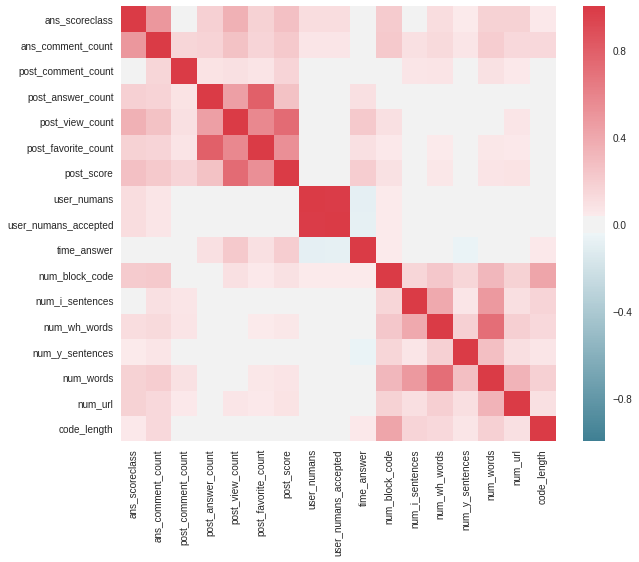

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
corr = df4.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

No se encuentran características muy relacionados y considerando que se tienen 16, se evaluarán todas en el clasificador. 

Con la experiencia para responder la pregunta 1 consideramos el clasificador Decision Tree para este segundo experimento:

In [76]:
for each in num_features:
    mean, std = df4[each].mean(), df4[each].std()
    df4.loc[:, each] = (df4[each] - mean)/std
df4.describe()

,ans_scoreclass,ans_comment_count,post_comment_count,post_answer_count,post_view_count,post_favorite_count,post_score,user_numans,user_numans_accepted,time_answer,num_block_code,num_i_sentences,num_wh_words,num_y_sentences,num_words,num_url,code_length
count,18000.000000,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04
mean,1.500000,-2.555920e-14,6.319760e-16,-8.189267e-15,-6.043545e-16,-1.214444e-15,-6.532127e-15,7.454716e-16,-1.503581e-16,4.307881e-15,1.674399e-14,-1.731831e-15,8.819180e-15,-8.780631e-17,3.205362e-15,1.300578e-14,-5.404171e-15
std,1.707873,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.000000,-7.617841e-01,-7.141200e-01,-2.898542e-01,-3.422702e-01,-1.609679e-01,-7.432025e-01,-3.100736e-01,-2.666938e-01,-3.162255e+00,-7.502851e-01,-4.239193e-01,-4.255939e-01,-4.868442e-01,-6.411933e-01,-4.148846e-01,-3.779192e-01
25%,0.000000,-7.617841e-01,-7.141200e-01,-2.329040e-01,-3.398521e-01,-1.609679e-01,-2.473326e-01,-3.029521e-01,-2.639849e-01,-3.577701e-01,-7.502851e-01,-4.239193e-01,-4.255939e-01,-4.868442e-01,-4.785106e-01,-4.148846e-01,-3.779192e-01
50%,1.500000,-3.014066e-01,-3.885746e-01,-1.759539e-01,-3.029194e-01,-1.509822e-01,-2.238793e-01,-2.741566e-01,-2.466478e-01,-3.577701e-01,-8.320030e-02,-4.239193e-01,-4.255939e-01,-4.868442e-01,-2.751573e-01,-4.148846e-01,-2.734890e-01
75%,3.000000,3.891596e-01,2.625162e-01,-5.103367e-03,-5.583738e-02,-8.108239e-02,-6.640710e-02,-1.356750e-01,-1.507522e-01,-3.521330e-01,5.838845e-01,3.751746e-01,4.482159e-01,-4.868442e-01,1.112139e-01,2.167590e-01,1.403321e-02
max,4.000000,1.397030e+01,1.914415e+01,2.915338e+01,2.651271e+01,2.757927e+01,3.776377e+01,1.145212e+01,1.105550e+01,8.202252e+00,1.726100e+01,2.354890e+01,2.141965e+01,2.644576e+01,2.717754e+01,2.611415e+01,3.504970e+01


In [77]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier


In [79]:
X = df4.iloc[:,1:]
y = df4.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3000,random_state=10)
dummyclf= DummyClassifier(strategy="stratified", random_state=10)
dummyclf.fit(X_train, y_train)
y_pred = dummyclf.predict(X_test)
print ("Dummy Classifier")
print(classification_report(y_test, y_pred))

clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ("Decision Tree")
print(classification_report(y_test, y_pred))

Dummy Classifier
             precision    recall  f1-score   support

         -1       0.14      0.14      0.14       467
          0       0.18      0.16      0.17       530
          1       0.15      0.15      0.15       527
          2       0.15      0.16      0.15       484
          3       0.19      0.17      0.18       506
          4       0.15      0.17      0.16       486

avg / total       0.16      0.16      0.16      3000

Decision Tree
             precision    recall  f1-score   support

         -1       0.36      0.37      0.36       467
          0       0.41      0.39      0.40       530
          1       0.38      0.39      0.39       527
          2       0.51      0.52      0.52       484
          3       0.52      0.51      0.51       506
          4       0.65      0.65      0.65       486

avg / total       0.47      0.47      0.47      3000



En este segundo experimento se obtuvo que la clase de respuestas con score mayor a 10 obtuvieron un mayor valor de precision, siendo la clase de respuestas con score mayor a 100 la que se clasificó co un 65% de precisión. 

A continuación analizaremos como influyeron las características seleccionadas en este clasificador.

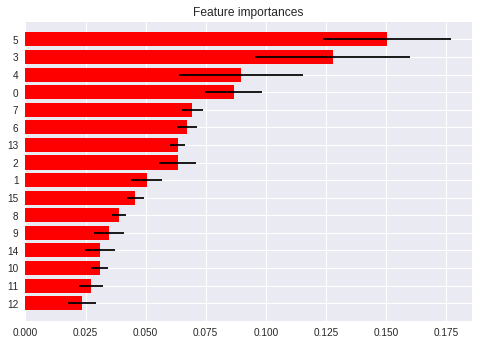

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")

plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()

In [82]:
list(df4)

['ans_scoreclass',
 'ans_comment_count',
 'post_comment_count',
 'post_answer_count',
 'post_view_count',
 'post_favorite_count',
 'post_score',
 'user_numans',
 'user_numans_accepted',
 'time_answer',
 'num_block_code',
 'num_i_sentences',
 'num_wh_words',
 'num_y_sentences',
 'num_words',
 'num_url',
 'code_length']

Las características relacionadas al post que se está respondiendo como el score del post, favorito, cantidad de comentarios tienen mayor influencia en el clasficador. 

A continuación eliminaremos esas características para observar el comportamiento del resto.

In [86]:
df_ans=pd.DataFrame(data=df4, columns=['ans_scoreclass','ans_comment_count',
 'user_numans',
 'user_numans_accepted',
 'time_answer',
 'num_block_code',
 'num_i_sentences',
 'num_wh_words',
 'num_y_sentences',
 'num_words',
 'num_url',
 'code_length'], index=df4.index)

X = df_ans.iloc[:,1:]
y = df_ans.iloc[:,0]

clf=DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3000,random_state=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ("Decision Tree")
print(classification_report(y_test, y_pred))

Decision Tree
             precision    recall  f1-score   support

         -1       0.32      0.34      0.33       467
          0       0.31      0.28      0.30       530
          1       0.24      0.24      0.24       527
          2       0.20      0.20      0.20       484
          3       0.24      0.23      0.23       506
          4       0.35      0.36      0.35       486

avg / total       0.27      0.28      0.27      3000



Como se puede observar se obtiene menos de 0.5 en precisión, teniendo las clases -1, 0 y 1 mayor valor que las clases 2 y 3 que son las respuestas con score mayor a 10, por lo que concluimos que las características seleccionadas para la respuesta además del post no se pueden usar solas en la predicción por que no son variables dependientes y además que la probabilidad de que una respuesta tenga un buen score aumenta cuando el post obtiene un buen score, es decir es una  buena pregunta.

## Análisis PREGUNTA 3: ¿Una pregunta con TAG's específicos o populares siempre obtiene una respuesta?

Las reglas de asociación en la minería de datos se utilizan para encontrar hechos que ocurren en común dentro de un conjunto de datos. Dicho de otra manera que debe ocurrir ciertas condiciones para que se produzca cierta condición. Para encontrar estas reglas se debe considerar cada posible combinación de condiciones.

Una hipótesis planteada en el proyecto establecía determinar las características de las preguntas(POST) que permitan predecir si tendran alguna respuesta asociada. Basado en este hecho se decidió plantear el análisis de reglas de asociación de los TAGS que tienen asociados las preguntas registradas en StackOverFlow.

El objetivo del análisis de las reglas de asociación en el proyecto es descubrir como llegan a estar asociados los TAGS con los que fueron registrados las preguntas que tienen respuesta y los TAGS de aquellas preguntas registradas que no tienen una respuesta.

**1. Reglas de Asociacion: Preguntas  sin Respuesta Asociada**

Para el análisis de asociación de esta clase de preguntas, se considero que la pregunta no tuviera ninguna respuesta asociada y que el contador de respuestas de la pregunta se quede en 0.

In [88]:
import pandas as pd
df = pd.read_csv("preguntasSinRespuesta.csv", quotechar='"',
               usecols=['question_id','tags_asociados','cant_tags_asociados','tiempo_seg'])
df.head(10)

,question_id,tags_asociados,cant_tags_asociados,tiempo_seg
0,29319719,php,3,0
1,29319719,mysql,3,0
2,29319719,serialization,3,0
3,13230777,android,2,0
4,13230777,camera,2,0
5,21563976,c#,3,0
6,21563976,winforms,3,0
7,21563976,installation,3,0
8,22789693,c#,2,0
9,22789693,winforms,2,0


Para el análisis de las reglas de asociacion, se relizaron pruebas en "R", a continuacíon se detalla el proceso :

a) CARGA LIBRERIA Y DATOS.

    library(arulesViz);library(arules)

    data   <- read.csv("preguntasSinRespuesta.csv") # lectura de datos desde el archivo csv
    data2  <- read.csv("preguntasConRespuesta.csv")
    
b) TRANSFORMACION DEL DATA.FRAME EN UNA ISTA TRANSACCIONAL.

    pregSinResp <- data
    pregSinResp <- split(pregSinResp$tags_asociados,pregSinResp$question_id) # convierte datos en lista
    pregSinResp <- as(pregSinResp,"transactions") # convierte datos en transacciones
    
    pregResp <- data2
    pregResp <- split(pregResp$tags_asociados,pregResp$question_id) # convierte datos en lista
    pregResp <- as(pregResp,"transactions") # convierte datos en transacciones
    
 c) CREACION DE REGLAS.
 
     reglaPregSinRespuesta<-eclat(pregSinResp, parameter = list(supp = 0.001, minlen = 3)) #Mining Associations with Eclat
     reglaPregConnRespuesta<-eclat(pregResp, parameter = list(supp = 0.001, minlen = 3))##Mining Associations with Eclat
     
 d) APLICAION DE REGLAS DE INDUCCION.  
 
     reglaInduccionSR<-ruleInduction(reglaPregSinRespuesta,pregSinResp,confidence=0.5) #Apllicando reglas de induccion
     reglaInduccionCR<-ruleInduction(reglaPregConnRespuesta,pregResp,confidence=0.5) #Apllicando reglas de induccion
     
     reglaInduccionSR<-sort(reglaInduccionSR,by="lift",decreasing="TRUE") #ordenacion por LIFT  Desc
     reglaInduccionCR<-sort(reglaInduccionCR,by="lift",decreasing=TRUE) #ordenacion por LIFT  Desc
     
     inspect(head(reglaInduccionSR,10)) #muesta el detalle de las reglas de induccion para las preguntas sin respuesta
     inspect(head(reglaInduccionCR,10)) #muesta el detalle de las reglas de induccion para las preguntas con respuesta

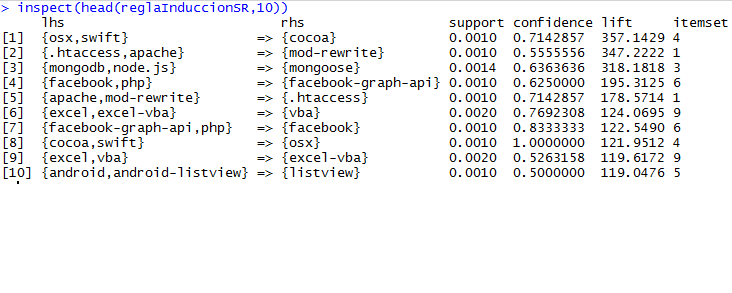

In [89]:
from IPython.display import Image
Image("img/reglaInduccionSinRespuesta.png")

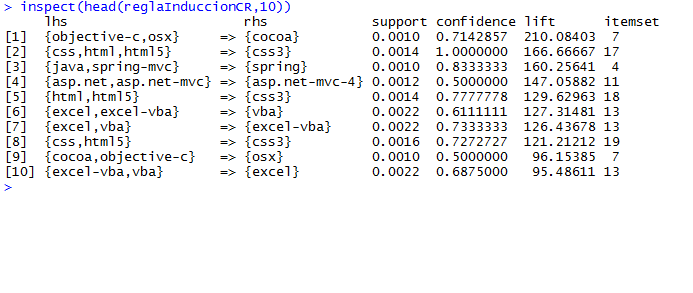

In [90]:
from IPython.display import Image
Image("img/reglaInduccionConRespuesta.png")

Para el proceso de las reglas de asociacion de los TAGS de los POST, se utilizo el algoritmo ECLAT, en lugar de APRIORI, pues al aplicar ECLAT el numero de asociaciones creadas era inferior al aplicar APRIORI, pero al aplicar la idnuccion en las reglas generadas sobre las transacciones de los datasets se tenian asociaciones que se esperaban.  A continuación se detallan algunos gráficos generados del conjunto de asociaciones:

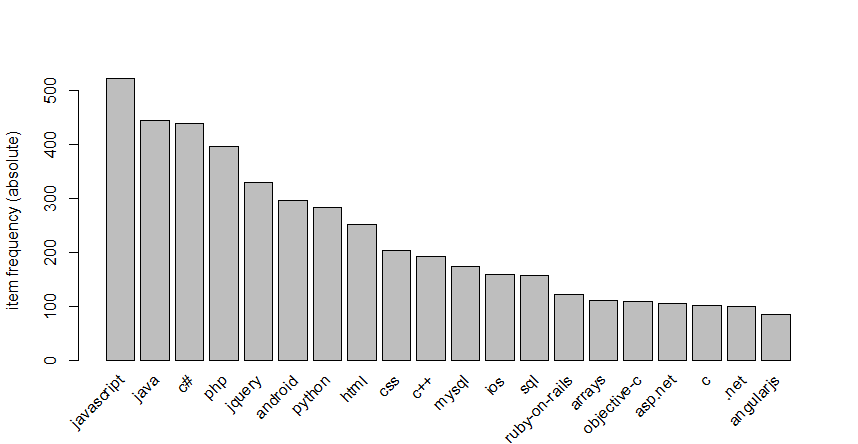

In [92]:
#itemFrequencyPlot(reglaPregConnRespuesta,topN=20,type="absolute")
from IPython.display import Image
Image("img/diagBarras**Figura 1:** Diagrama de Barras del los TAGS mas Frecuentes de las Preguntas con RespuestaTagsPregConRespuesta.png")

**Figura :** Diagrama de Barras del los TAGS mas Frecuentes de las Preguntas con Respuesta

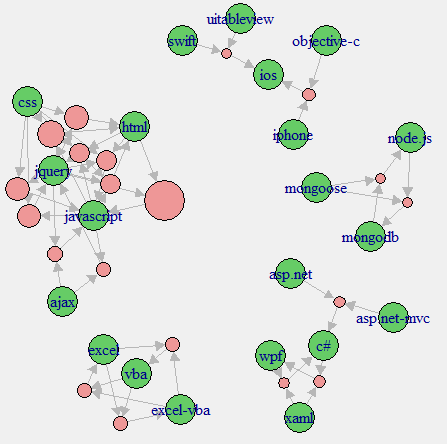

In [93]:
#plot(head(reglaInduccionSR,20),method="graph",interactive = TRUE,shading = NA)
from IPython.display import Image
Image("img/grafoPregSinRespuesta.png")

**Figura:** Grafo de las Asociaciones Generadas para las Preguntas sin Respuesta

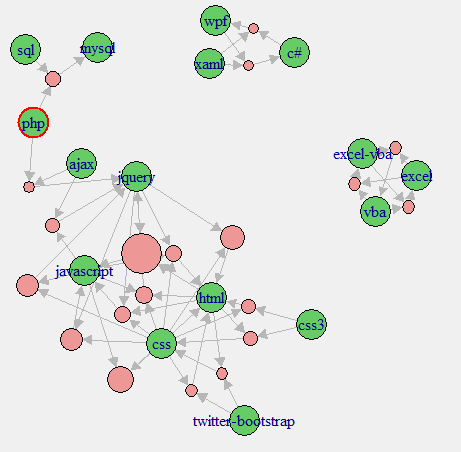

In [95]:
#plot(head(reglaInduccionCR,20),method="graph",interactive = TRUE,shading = NA)
from IPython.display import Image
Image("img/grafoPregConRespuesta.png")

**Figura :** Grafo de las Asociaciones Generadas para las Preguntas sin Respuesta

In [96]:
#DETALLE DE LOS TAGS MAS UTILIZADOS EN LAS PREGUNTAS REGISTRADAS EN STACK OVERFLOW
import pandas as pd
df = pd.read_csv("top_tags.csv", quotechar='"',
               usecols=['tag_name'])
df.head(20)

,tag_name
0,javascript
1,java
2,c#
3,php
4,android
5,jquery
6,python
7,html
8,c++
9,ios


Una vez aplicadas las reglas de asociación sobre los TAGS de los POST(preguntas) que no tienen una respuesta asoicada y los TAGS de los POST que tiene respuestas asociadas y basandonos en la reglas de induccion aplicadas, pudimos llegar a las conclusiones siguientes : 
* Si bien en el conjunto de asociaciones generados algunos de los TAGS de las preguntas sin una respuesta, se encuentran entre los TAGS mas frecuentemente utilizados (apache,php,android, etc.), este caso podria tornarse interesante por el hecho de que la mayoria de las preguntas con respuesta generalmente son registrados con algun TAG popular o frecuentemente utilizado. Para estos casos en particular llegamos a determinar que se pudo dar el caso de que debido a que una pregunta es registrada con hasta 5 TAGS, la pregunta tienen un mix de TAGS, es decir tiene TAGS frecuentes e y no frecuentes que fueron registrados con las preguntas.



* Para los conjuntos de asociaciones de las preguntas que tienen respuesta, no se presentaron casos fuera de serie, las asociaciones generadas eran las que se esperaban, es decir en conjunto de asociaciones de los TAGS de las pregusntas se encuentran entre los TAGS mas frecuentemente utilizados en las preguntas.